In [1]:
toliman_settings = {
                    # Eduardo's values:
                    'diam': 0.001 * 2. * 150, 
                    'm1_fl': 0.5717255, 
                    'm1_m2_sep': 0.54933763033373, 
                    'm2_fl': -0.02337895948640,  
                    'bfl': 0.52761,#0.58999999998985,  
                    'm2_rad': 0.00590401477581,
                    'm1_conic': -1.00011470000000,
                    'm2_conic': -1.16799179177759,
                    # Go for 5-fold symmetry to match assumed rosette
                    'm2_strut_width': 0.01,
                    'm2_supports': 5
                    }
prescription_vals = toliman_settings
prescription_vals['beam_ratio'] = 0.2
prescription_vals['tilt_x'] = 0.00
prescription_vals['tilt_y'] = 0.00

tilts_x = [0., 1., 2., 5., 10.]
tilts_y = tilts_x

gridsize = 2048
nrows=len(tilts_y)
hwidth = 256
off_x = int(gridsize/2) -hwidth
off_y = int(gridsize/2) -hwidth
npix = 2*hwidth


In [2]:
import numpy as np
import matplotlib.pylab as plt

def plot_psf_grid(wavefronts, nrows=1,
                off_x = 0,
                off_y = 0,
                npix = 80):
    ncols = int(len(wavefronts)/nrows)
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, sharey=True)
    for wavefront, ax in zip(wavefronts, axes.flat):
        im = ax.imshow(np.log10(wavefront[off_x:off_x+npix, off_y:off_x+npix]), interpolation = 'none', cmap='viridis', clim=[-7, -1.6])
    fig.subplots_adjust(hspace=0, wspace=0)
    plt.setp([a.get_xticklabels() for a in fig.axes], visible=False)
    plt.setp([a.get_yticklabels() for a in fig.axes], visible=False)
    plt.setp([a.get_yticklabels() for a in fig.axes[::ncols]], visible=True)
    plt.setp([a.get_xticklabels() for a in fig.axes[-ncols:]], visible=True)
    fig.colorbar(im, ax=axes.ravel().tolist())
    plt.show()

In [3]:
import proper
def gen_tilted_psfs(prescription,
                    prescription_vals,
                    tilts_x,
                    tilts_y,
                    wavelength = 0.6,
                    gridsize = 2048):
    wavefronts = []
    samplings = []
    for dx in tilts_x:
        for dy in tilts_y:
            prescription_vals['tilt_x'] = dx
            prescription_vals['tilt_y'] = dy
            (wavefront, sampling) = proper.prop_run(prescription, wavelength, gridsize, QUIET=True, PRINT_INTENSITY=False, PASSVALUE=prescription_vals)
            wavefronts.append(wavefront)
            samplings.append(sampling)
    return (wavefronts, samplings)

/home/ubuntu/miniconda/envs/astroconda/lib/python3.5/site-packages/pyfits/__init__.py:22: PyFITSDeprecationWarning: PyFITS is deprecated, please use astropy.io.fits
  PyFITSDeprecationWarning)  # noqa


##  Conic mirrors

In [4]:
(wavefronts, samplings) = gen_tilted_psfs('prescription_rc_conic',
                                           prescription_vals, tilts_x, tilts_y)


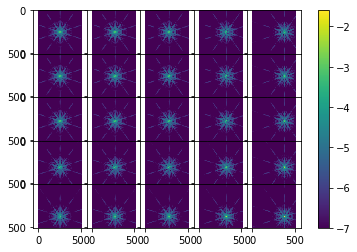

In [8]:
%matplotlib inline

plot_psf_grid(wavefronts, nrows=nrows,
                off_x = off_x,
                off_y = off_y,
                npix = npix)

##  Quadratic (paraboloid) mirrors

In [9]:
(wavefronts_quad, samplings_quad) = gen_tilted_psfs('prescription_rc_quad', prescription_vals, tilts_x, tilts_y)


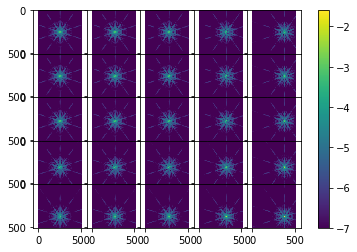

In [10]:
%matplotlib inline
plot_psf_grid(wavefronts_quad, nrows=nrows,
                off_x = off_x,
                off_y = off_y,
                npix = npix)

## Comparing PSFs

Look at most extreme case of 10''.

/home/ubuntu/miniconda/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


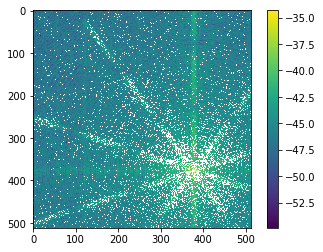

In [22]:
im=plt.imshow((np.log10(np.abs(wavefronts_quad[-1] - wavefronts[-1])**2))[off_x:off_x+npix,off_y:off_y+npix]) # 
plt.colorbar(im)